## Concepts Code

In [38]:
import networkx as nx

# every concepts return a list of list of node

##########################
## cycles
##########################

# cycle basis of the graph
def cycle_basis(G, max_num=None):
    all_cycles = []
    all_cycles_set = set()
    for node in G.nodes():
        current_cycles = nx.cycle_basis(G, node)
        current_set = [frozenset(c) for c in current_cycles]
        for idx, s in enumerate(current_set):
            if s not in all_cycles_set:
                all_cycles_set.add(s)
                all_cycles.append(current_cycles[idx])
    print(sorted(all_cycles, key=len, reverse=True)[:2])
    return all_cycles

# remove cycle if it forms a clique
def reduced_cycle_basis(G):
    cycle_basis = cycle_basis(G)
    max_cliques = max_cliques(G)
    return [cy for cy in cycle_basis for cl in max_cliques if not set(cy).issubset(cl)]

##########################
## cliques
##########################

# cliques with length > 2
def max_cliques(G):
    return sorted([clique for clique in nx.find_cliques(G) if len(clique)>2])

##########################
## "line" path
## similar to bridges
##########################

# return list of node and corresponding neighbors when the number of neighbors is le than n
def _le_n_neigh_nodes(G, n):
    l_nodes = {}
    for node in nx.nodes(G):
        neighbors = list(nx.neighbors(G, node))
        if len(neighbors) <= n:
            l_nodes[node] = neighbors
    return l_nodes

# construct the path where each node as
def _search_line_rec(l_node, path, l_nodes): # faster implementation possible with dp or check presence
    path.append(l_node)
    if l_node in l_nodes:
        for neighbors in l_nodes[l_node]:
            if neighbors not in path:
                _search_line_rec(neighbors, path, l_nodes)
    return path

# return the "line" paths of the graph, n constrain the "path size"
def line_paths(G):
    line_paths = []
    l_nodes = _le_n_neigh_nodes(G, 2)

    for l_node in list(l_nodes.keys()):
        path = _search_line_rec(l_node, [], l_nodes)
        line_paths.append(path)

    reduced_line_path = list([list(x) for x in set([frozenset(path) for path in line_paths if len(path) > 2])])
    return reduced_line_path


##########################
## Component
##########################

# Generates nodes in each maximal k-edge-connected component in G.
def k_edge_comp(G, k):
    return [comp for comp in sorted(map(sorted, nx.k_edge_components(G, k=2))) if len(comp) > 2]

#A k-component is a maximal subgraph of a graph G that has, at least, node connectivity k: we need to remove at least k nodes
#to break it into more components. k-components have an inherent hierarchical structure because they are nested in terms of connectivity:
#a connected graph can contain several 2-components, each of which can contain one or more 3-components, and so forth.
def k_comp(G):
    return [list(comp[0]) for comp in nx.k_components(G).values()]


##########################
## Star
##########################

def _star_rec(node, visited, layer):
    if layer == 0:
        return
    visited.add(node)
    for neighbors in list(nx.neighbors(G, node)):
        _star_rec(neighbors, visited, layer-1)
    return list(visited)

def star(G, n):
    stars = []
    for node in nx.nodes(G):
        stars.append(_star_rec(node, set(), n+1))
    return stars



        
    
    

## Graph

In [39]:
G = nx.Graph()

nx.add_cycle(G, [0, 1, 2, 3])
nx.add_cycle(G, [0, 3, 4, 5])
# add clique
G.add_node(10)
G.add_edges_from([(1, 10), (2, 10)])
# add high order clique
G.add_node(11)
G.add_edges_from([(1, 11), (2, 11), (11, 10)])
# add line path
G.add_node(16)
G.add_node(12)
G.add_node(13)
G.add_node(14)
G.add_node(15)
G.add_node(17)
G.add_edges_from([(16, 4), (12, 13), (13, 14), (12, 16), (13, 15), (14, 17)])
G.add_node(18)
G.add_node(19)
G.add_node(20)
G.add_edges_from([(14, 18), (14, 19), (14, 20)])

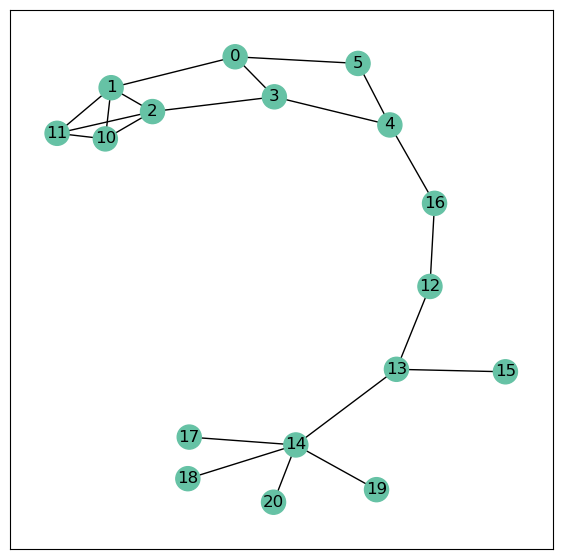

In [40]:
import matplotlib.pyplot as plt
import torch
from torch_geometric.nn import MessagePassing
from torch_geometric.utils import add_self_loops, degree
import numpy as np

def visualize(h, color, epoch=None, loss=None):
    plt.figure(figsize=(7,7))
    plt.xticks([])
    plt.yticks([])

    if torch.is_tensor(h):
        h = h.detach().cpu().numpy()
        plt.scatter(h[:, 0], h[:, 1], s=140, c=color, cmap="Set2")
        if epoch is not None and loss is not None:
            plt.xlabel(f'Epoch: {epoch}, Loss: {loss.item():.4f}', fontsize=16)
    else:
        nx.draw_networkx(G, pos=nx.spring_layout(G, np.random.seed(1234)), with_labels=True,
                         node_color=color, cmap="Set2")
    plt.show()


visualize(G, [1 for n in nx.nodes(G)])

# Clique

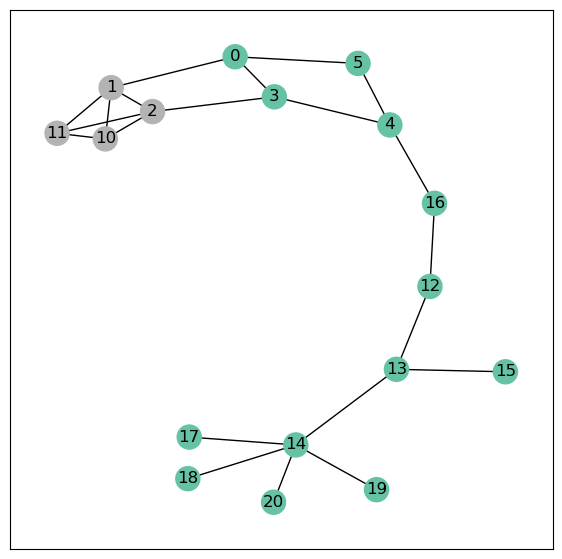

In [41]:
max_cliques_calc = max_cliques(G)
for i in max_cliques_calc:
    visualize(G, [1 if n in i else 0 for n in nx.nodes(G)])

# Cycle

## ALL CYCLE BASIS

[[3, 4, 5, 0], [1, 2, 3, 0]]


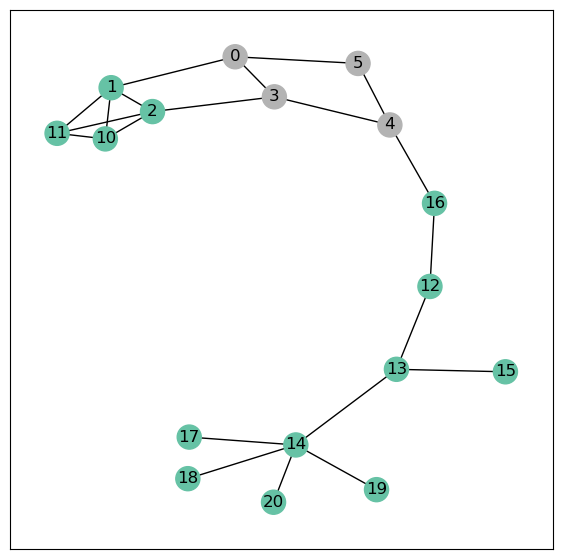

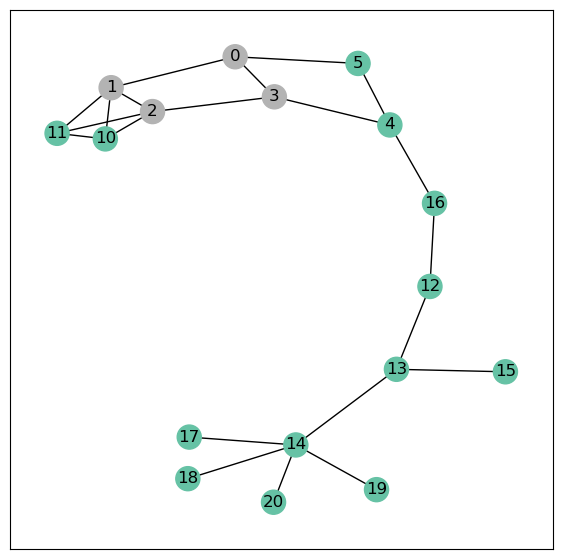

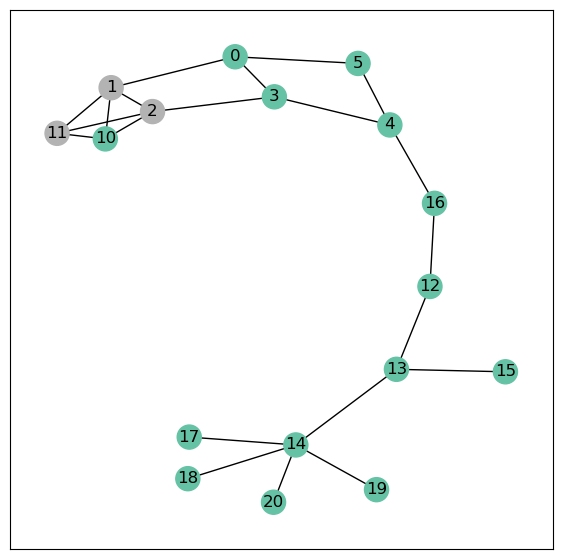

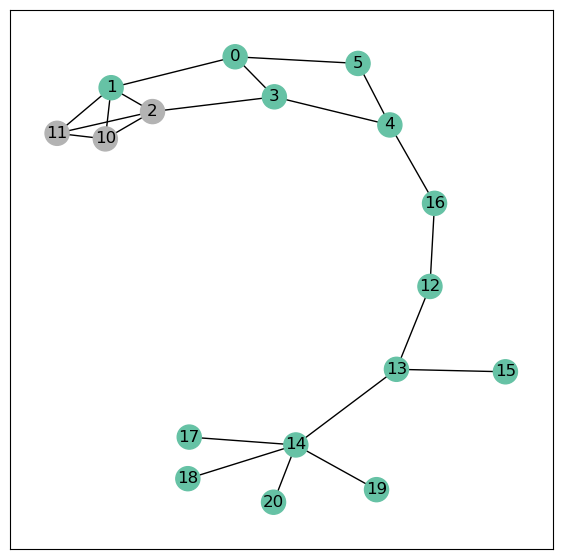

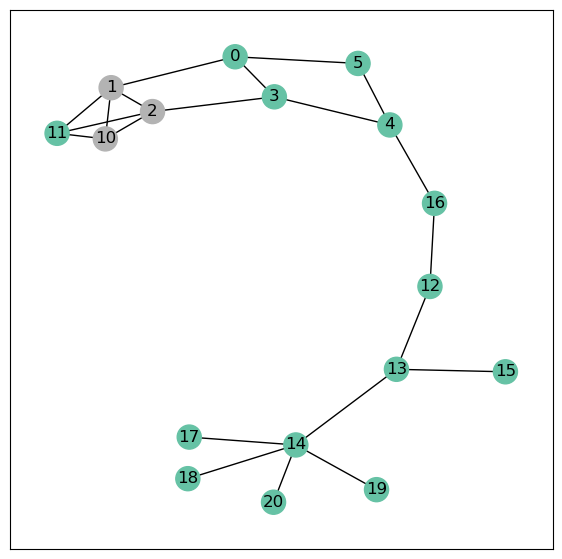

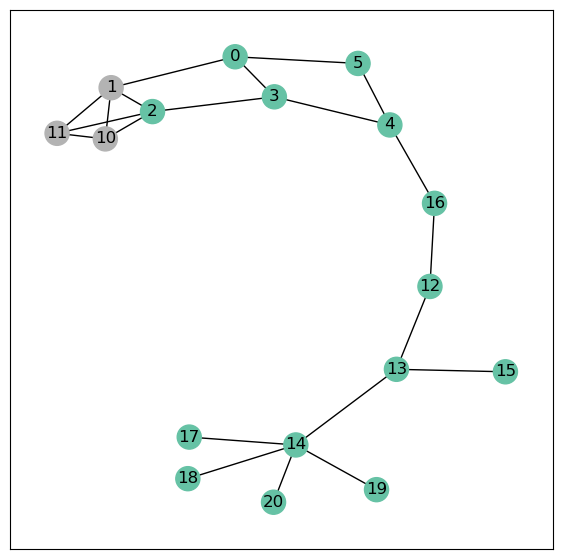

In [42]:
cycle_basis_calc = cycle_basis(G)
for i in cycle_basis_calc:
    visualize(G, [1 if n in i else 0 for n in nx.nodes(G)])

# LINE PATH

## N = 2

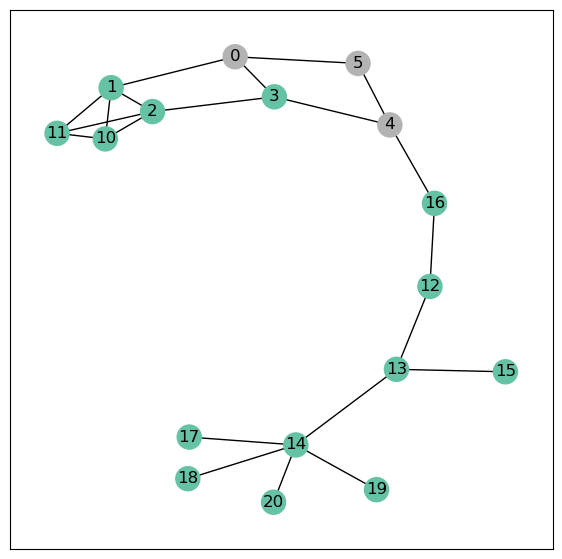

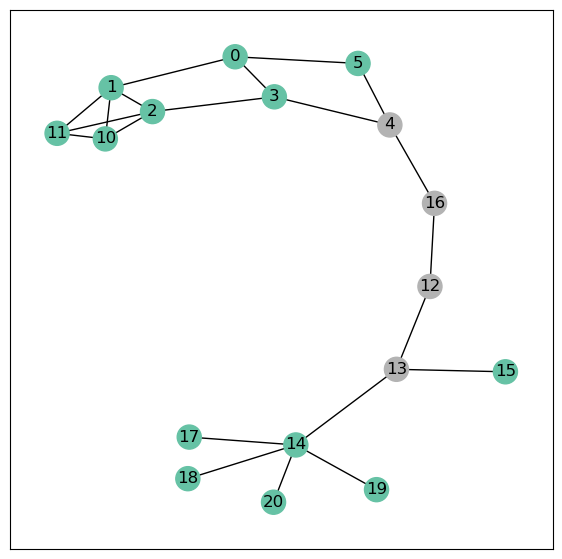

In [43]:
line_paths2_calc = line_paths(G)
for i in line_paths2_calc:
    visualize(G, [1 if n in i else 0 for n in nx.nodes(G)])

# Component
I find these operations on the library, to mee don't seems much interesting

## k-edge

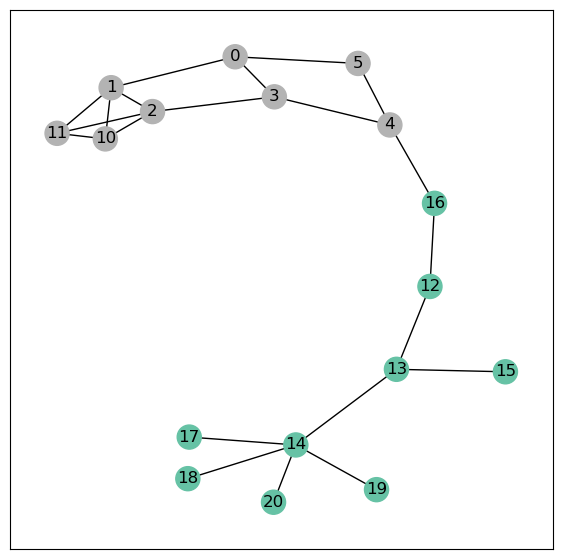

In [44]:
k_edge_comp2_calc = k_edge_comp(G, 2)
for i in k_edge_comp2_calc:
    visualize(G, [1 if n in i else 0 for n in nx.nodes(G)])

## k-node

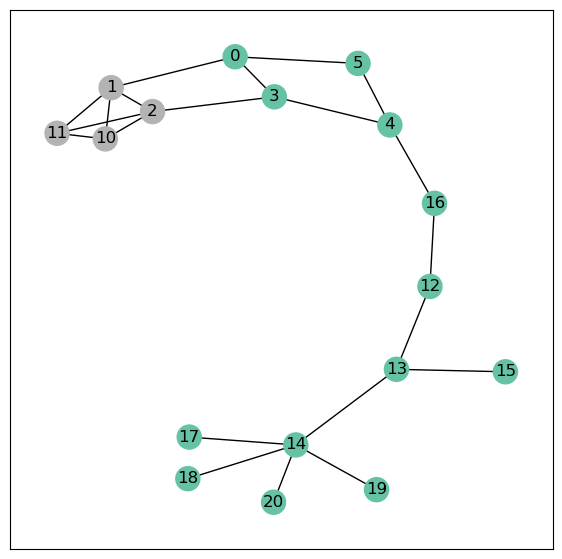

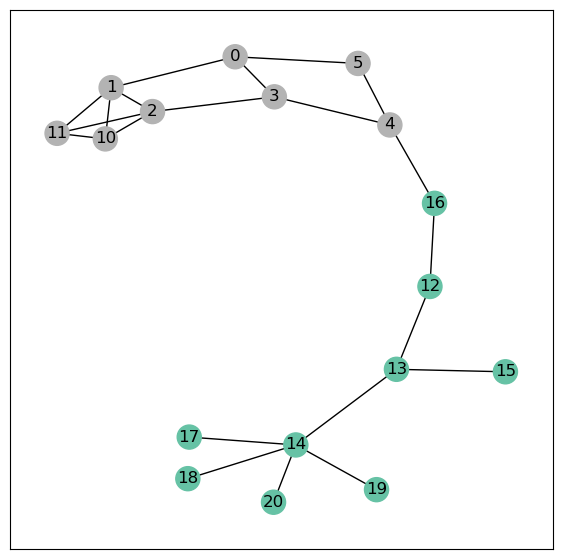

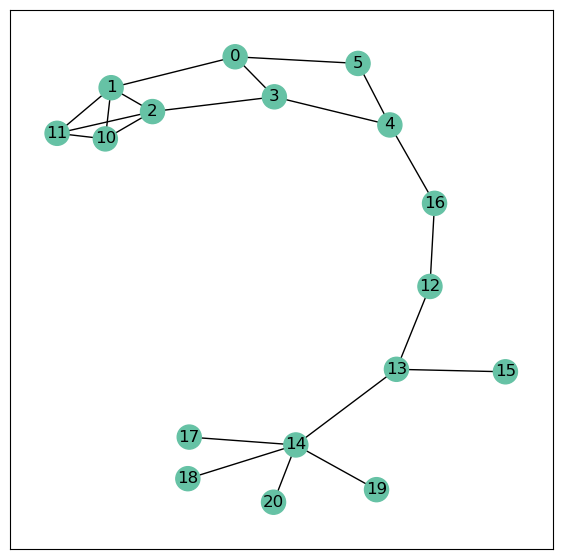

In [45]:
k_comp_calc = k_comp(G)
for i in k_comp_calc:
    visualize(G, [1 if n in i else 0 for n in nx.nodes(G)])

# Star
Select the n distance neighbours, this information should be more or less the same as running a gnn with n hop 

## DISTANCE 1

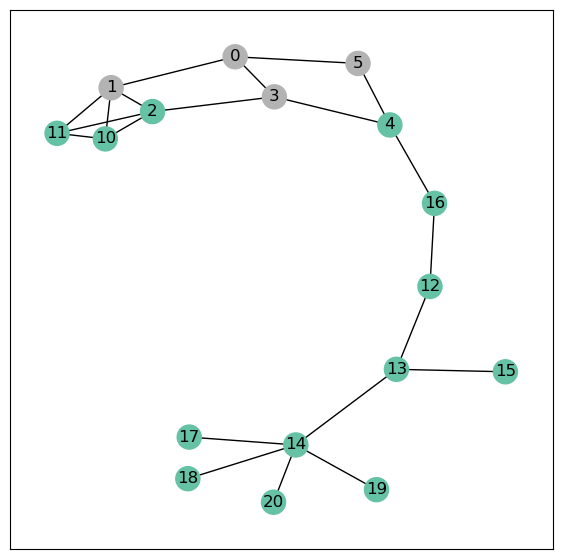

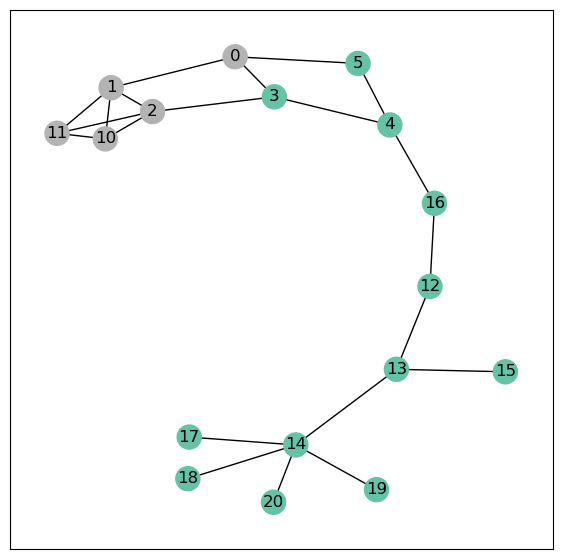

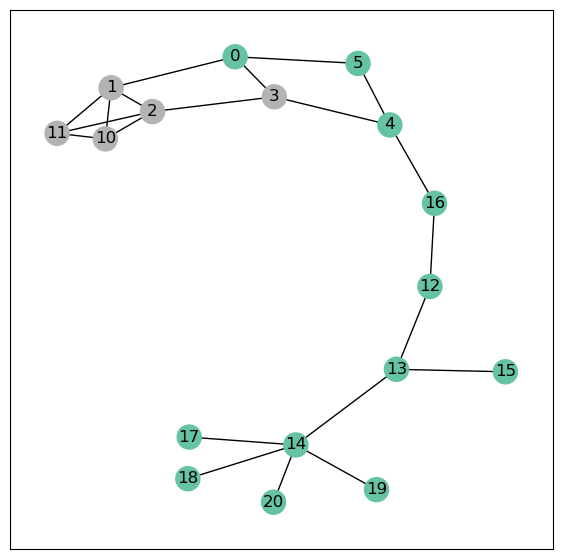

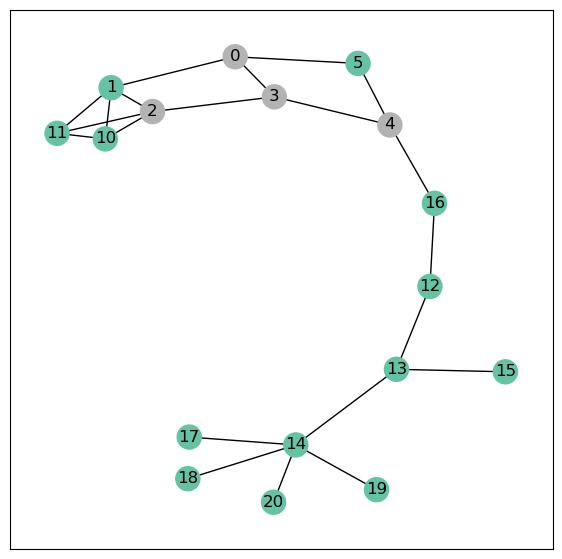

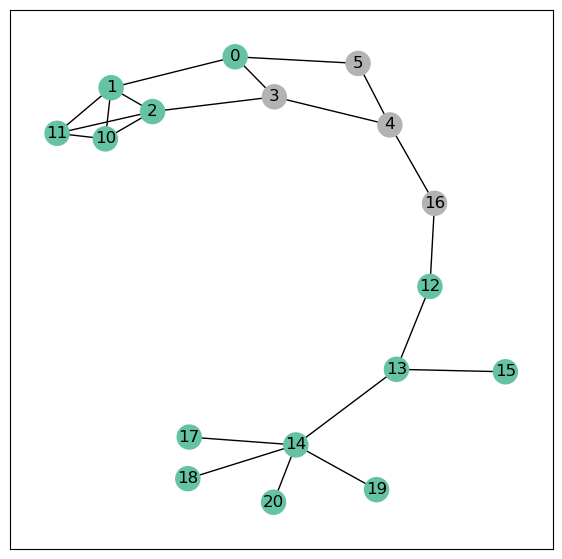

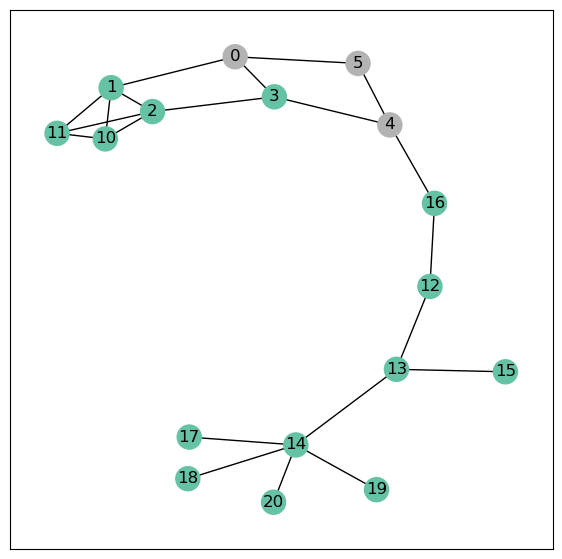

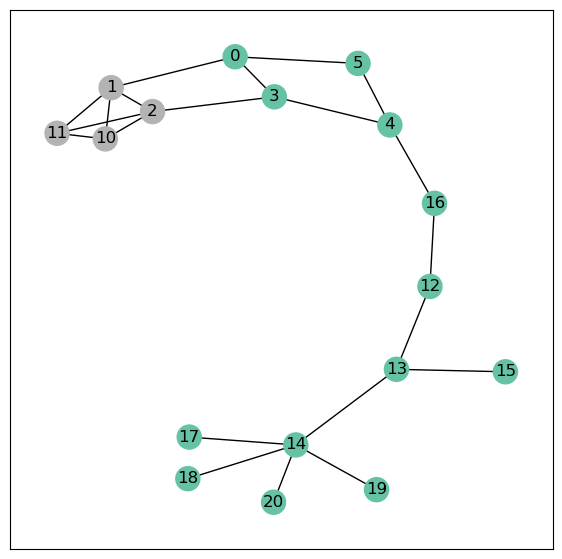

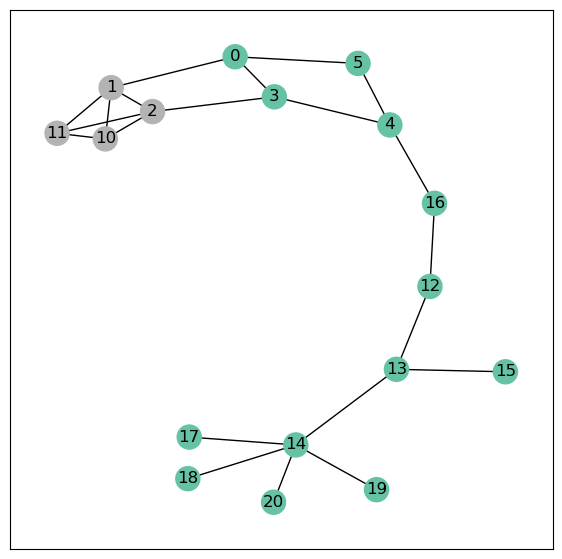

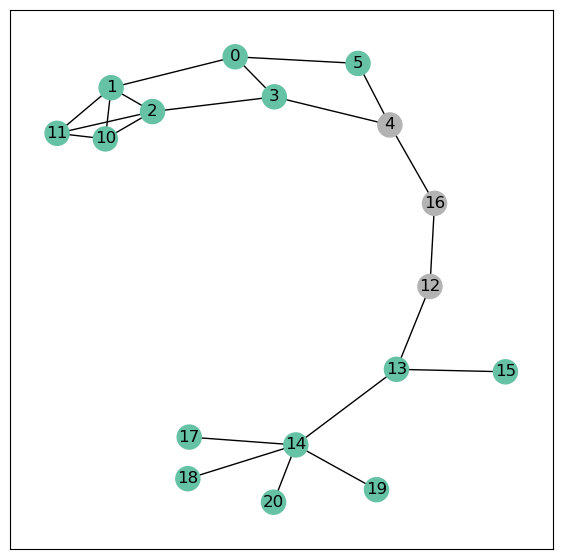

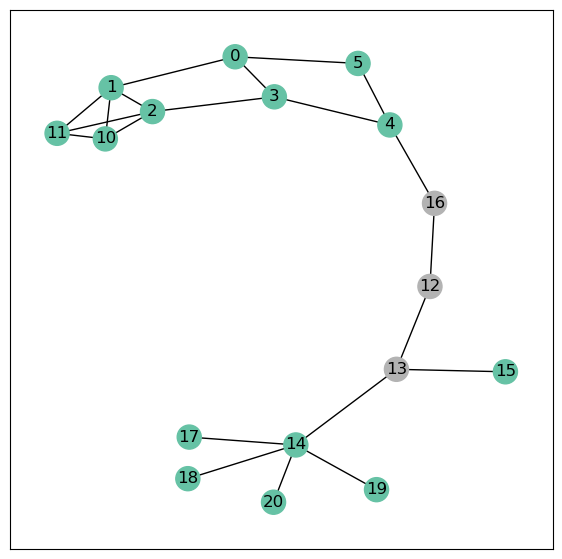

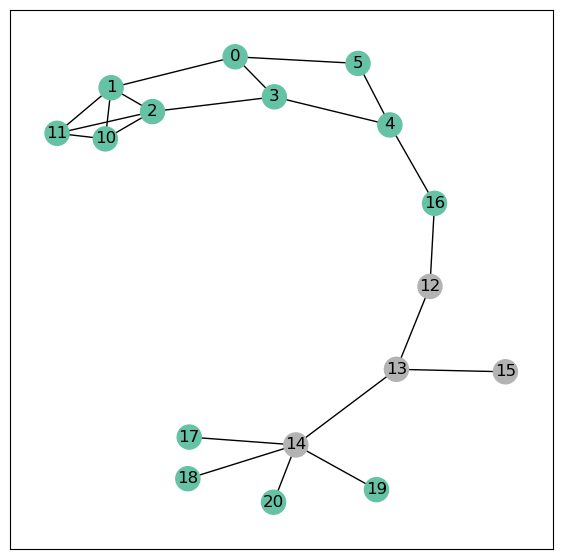

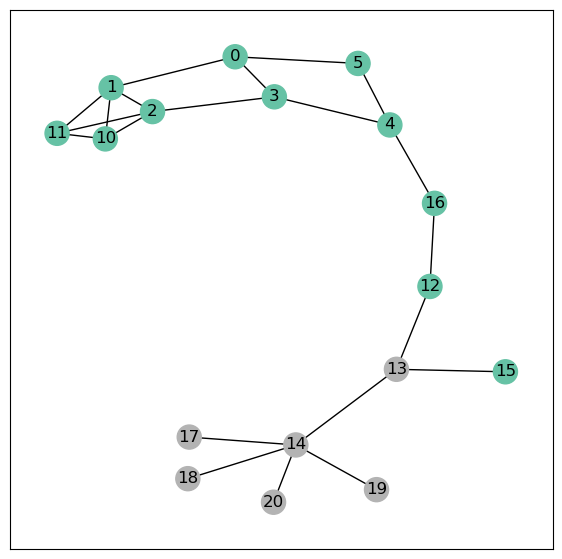

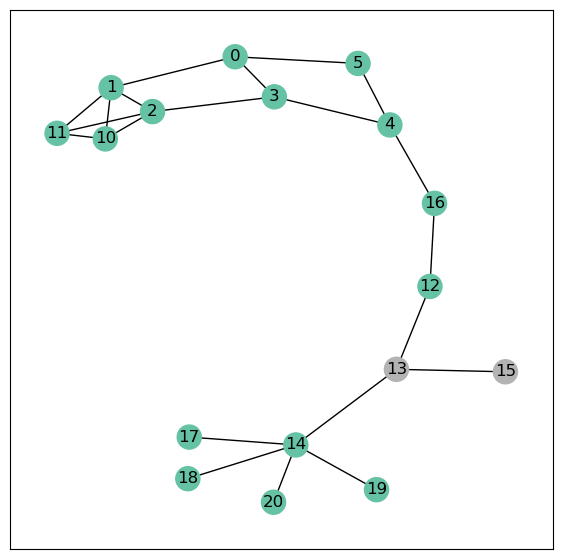

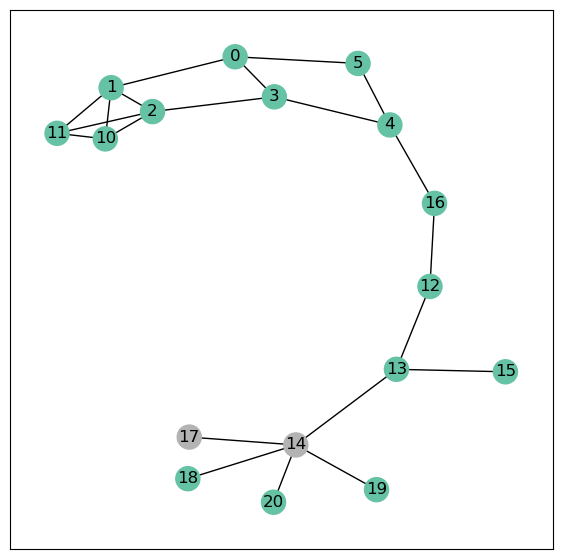

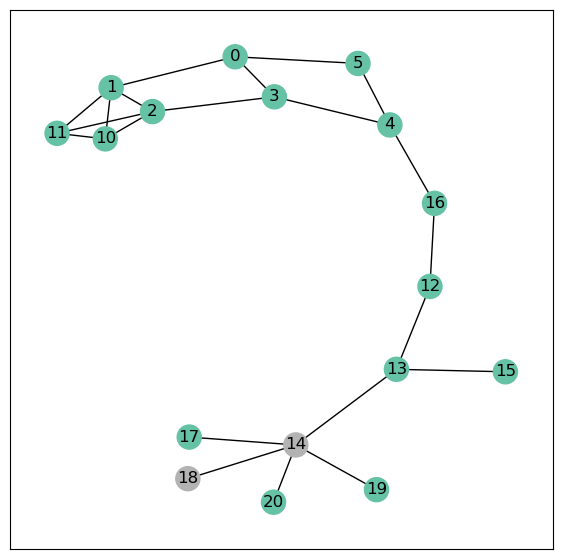

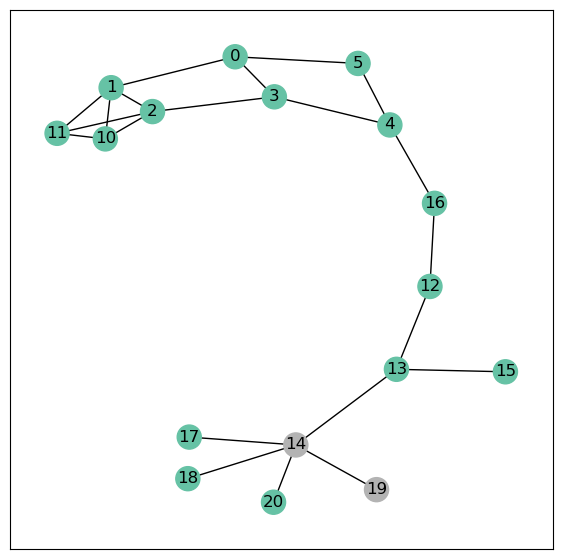

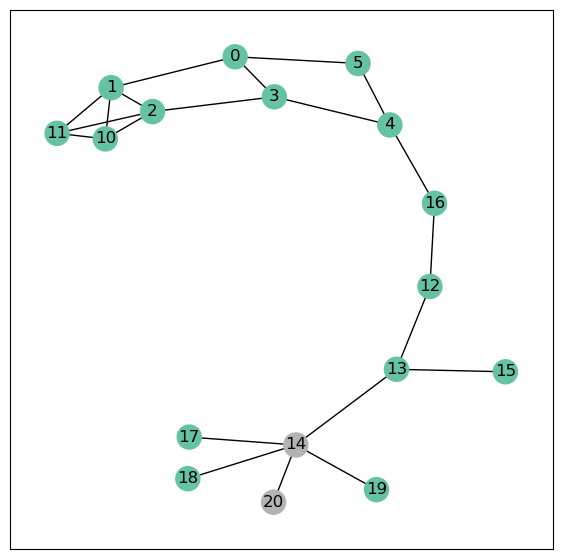

In [46]:
star1_calc = star(G, 1)
for i in star1_calc:
    visualize(G, [1 if n in i else 0 for n in nx.nodes(G)])

## DISTANCE 2

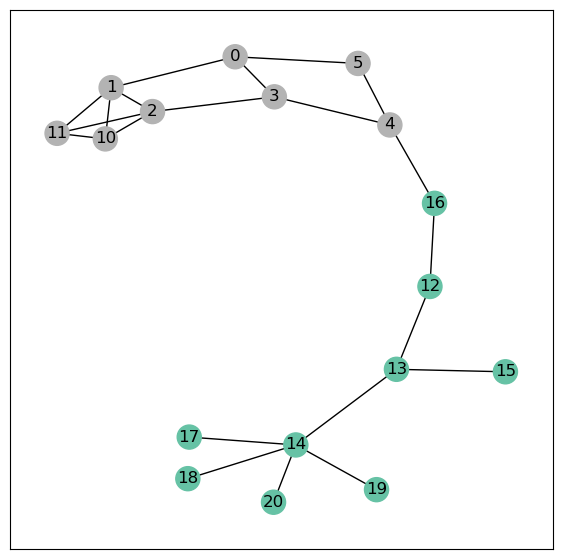

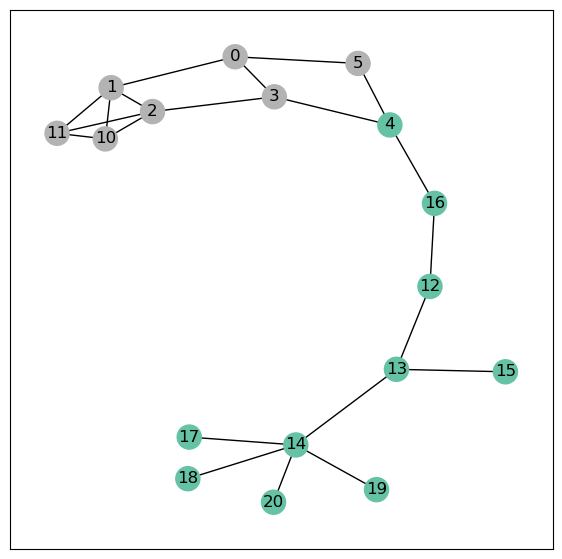

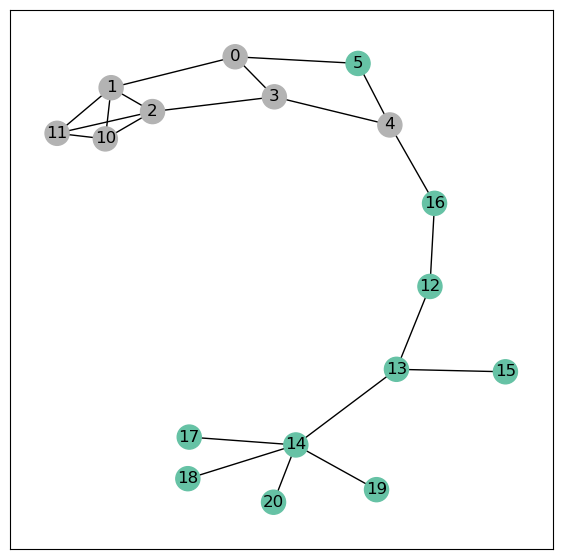

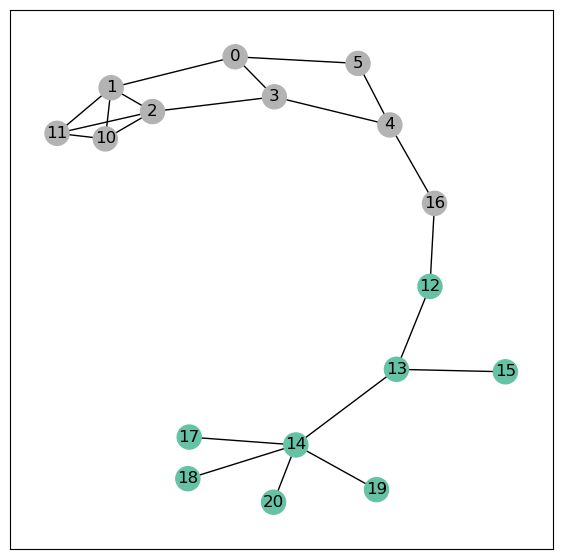

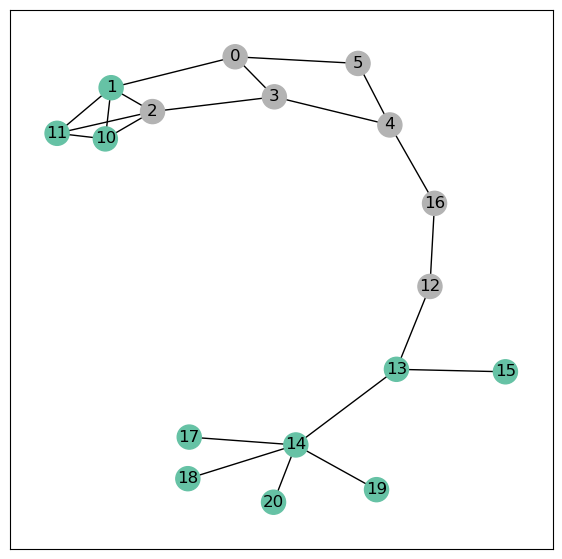

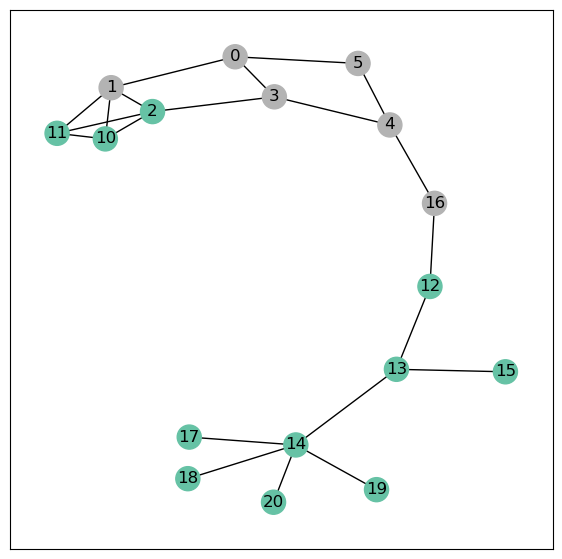

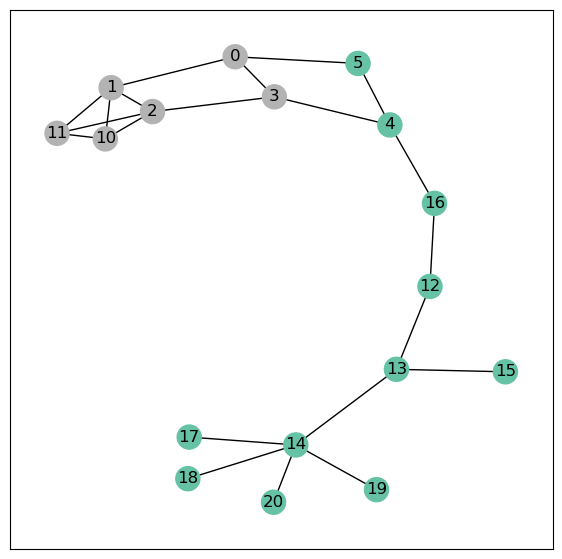

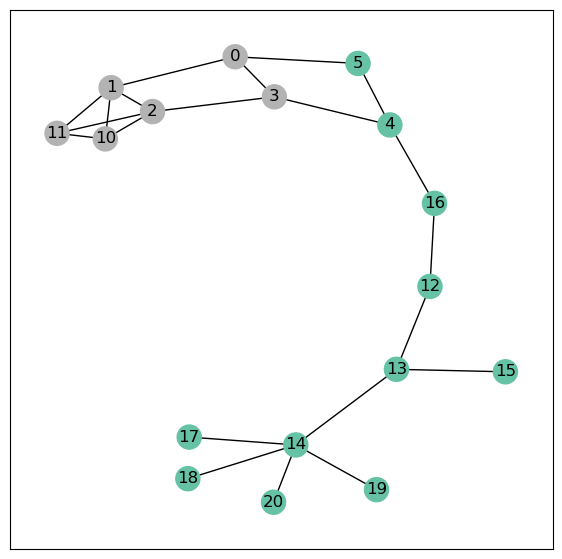

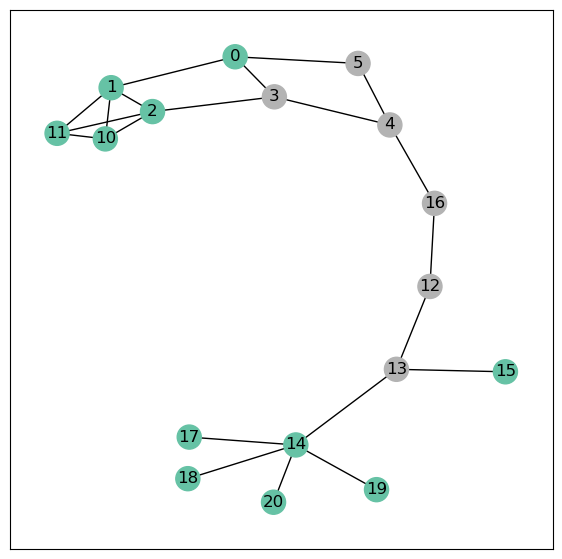

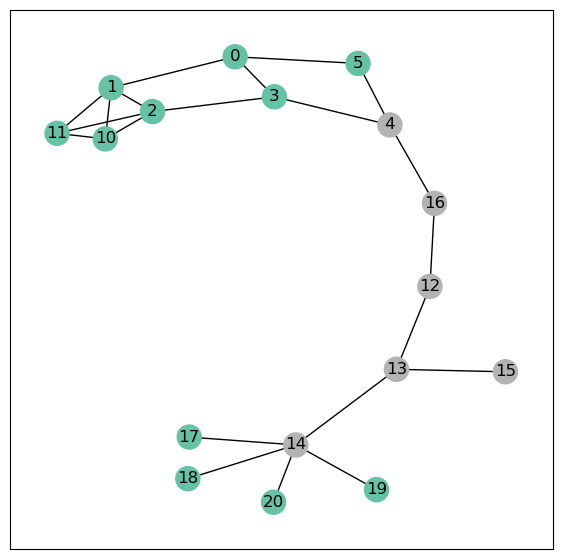

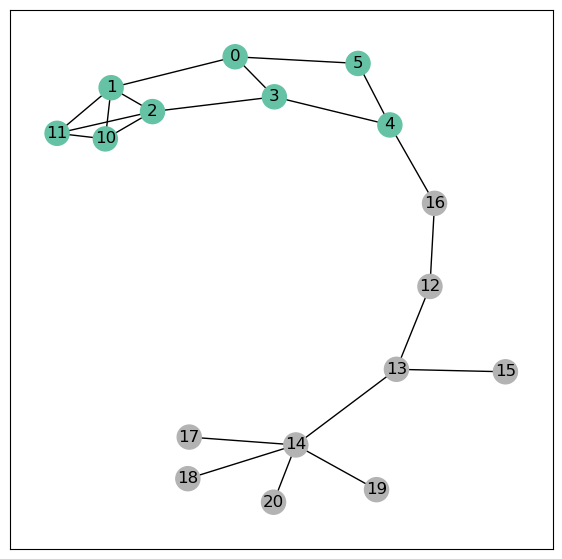

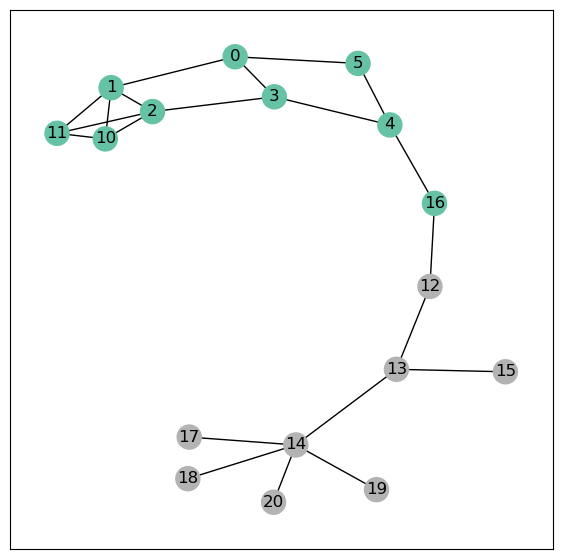

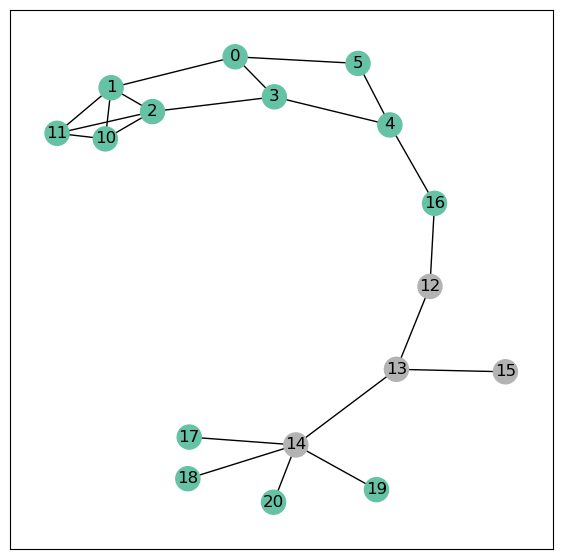

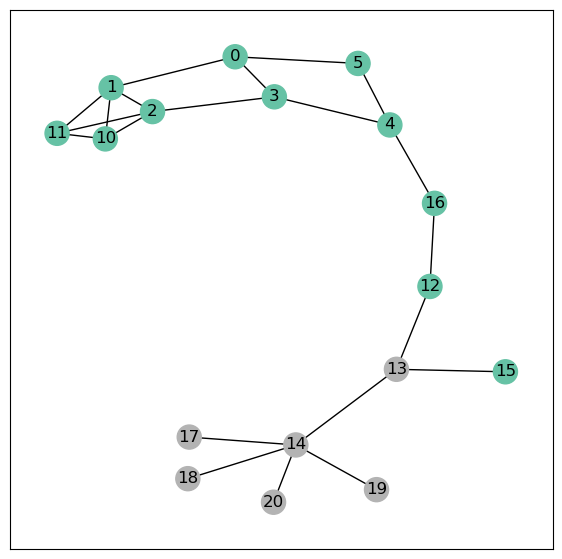

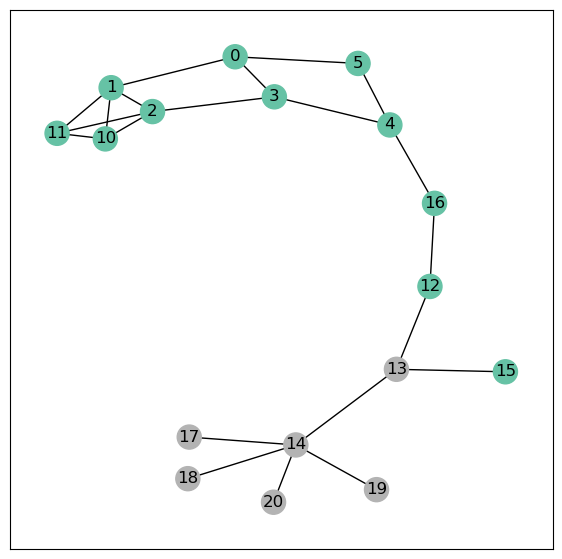

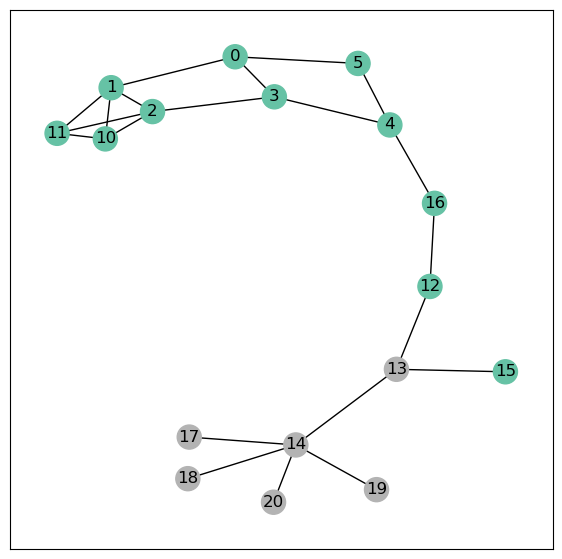

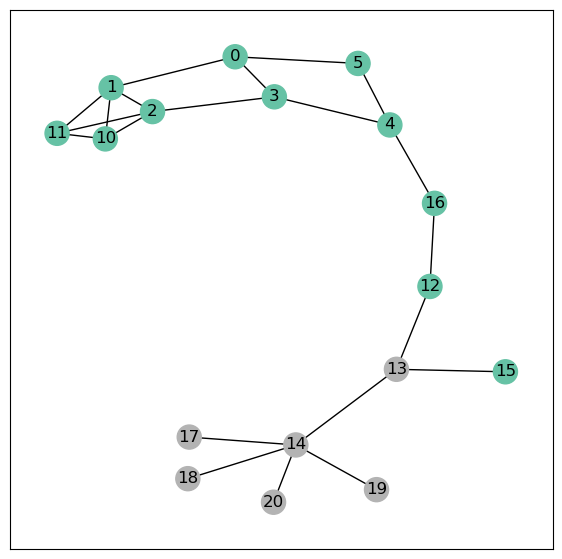

In [49]:
star2_calc = star(G, 2)
for i in star2_calc:
    visualize(G, [1 if n in i else 0 for n in nx.nodes(G)])

## STAR CONSTELLATION

In [79]:
###########################
## star_constellation
###########################

def stars_constellation(G, min_degree=1, max_exception=1):
    stars_constellation = []
    for node in nx.nodes(G):
        node_degree = len(list(nx.neighbors(G, node)))
        valid_neig = [neig for neig in list(nx.neighbors(G, node)) if len(list(nx.neighbors(G, neig)))==1]
        const_degree = len(valid_neig)
        const_exception = node_degree - const_degree
        if const_degree >= min_degree and const_exception <= max_exception:
            stars_constellation.append([node] + valid_neig)
        
        #print(node, node_degree, valid_neig, const_degree, const_exception)
        #print(node, [(neig, len(list(nx.neighbors(G, neig)))) for neig in list(nx.neighbors(G, node)) if len(list(nx.neighbors(G, neig)))==1])
        #print(node, [(neig, len(list(nx.neighbors(G, neig)))) for neig in list(nx.neighbors(G, node)) if len(list(nx.neighbors(G, neig))) > min_degree])
    return stars_constellation

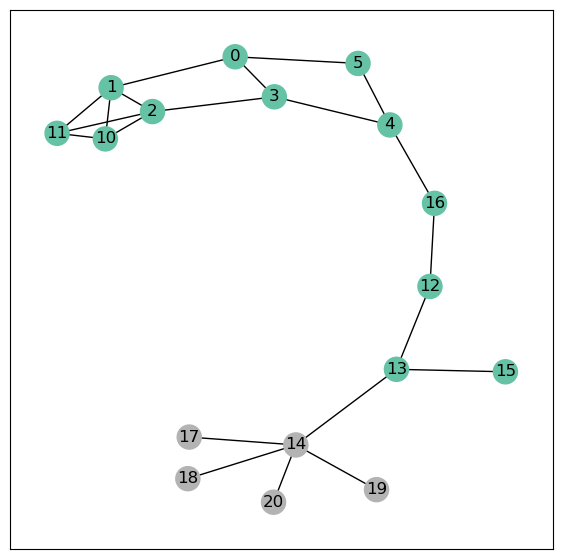

In [80]:
starconst_calc = stars_constellation(G, 1, 1)
for i in starconst_calc:
    visualize(G, [1 if n in i else 0 for n in nx.nodes(G)])

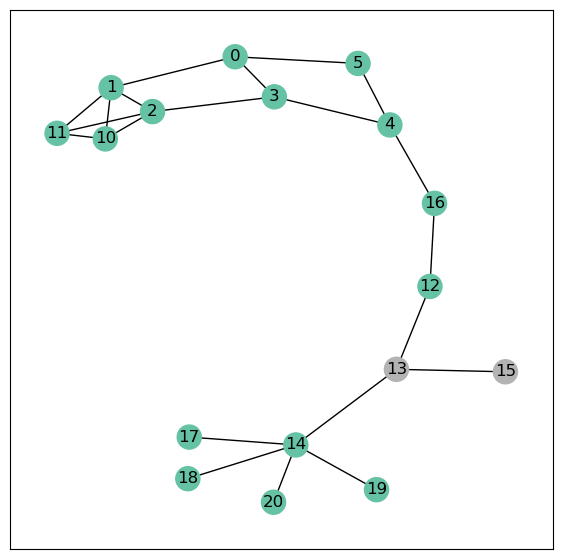

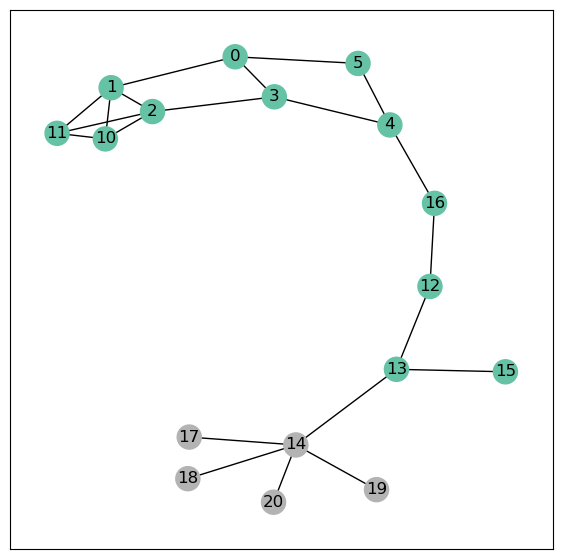

In [81]:
starconst_calc = stars_constellation(G, 1, 2)
for i in starconst_calc:
    visualize(G, [1 if n in i else 0 for n in nx.nodes(G)])

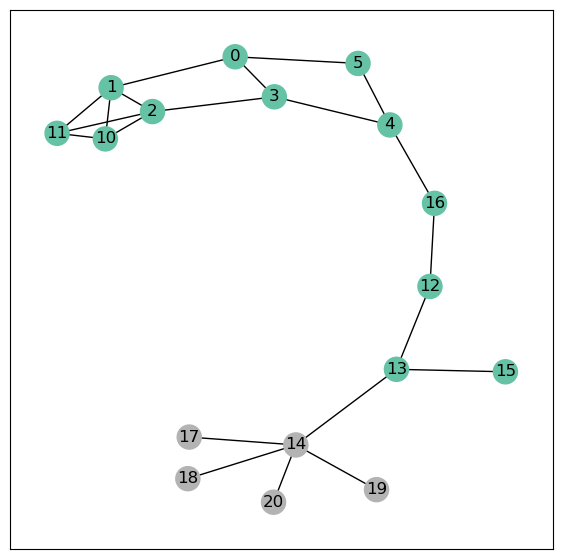

In [82]:
starconst_calc = stars_constellation(G, 2, 2)
for i in starconst_calc:
    visualize(G, [1 if n in i else 0 for n in nx.nodes(G)])

# Adding supernode to the Graph

I use previously calculated concepts, otherwise if I calculate them again the graph contains the supernode

In [ ]:
def supernode_edges(supernode, concepts):
    return [(supernode, n) for n in concepts]

def add_supernode(G, concepts, concept_name):
    for i, concept in enumerate(concepts):
        supernode_name = concept_name + str(i)
        G.add_node(supernode_name)
        G.add_edges_from(supernode_edges(supernode_name, concept))       

## Clique example

# All Cycle basis

In [ ]:
add_supernode(G, cycle_basis_calc, "cycle_basis")
visualize(G, [1 if "cycle_basis" not in str(n) else 0 for n in nx.nodes(G)])

## Line path

In [ ]:
add_supernode(G, line_paths2_calc, "line_path2")
visualize(G, [1 if "line_path2" not in str(n) else 0 for n in nx.nodes(G)])

# Star

In [ ]:
add_supernode(G, star1_calc, "star1_calc")
visualize(G, [1 if "star1_calc" not in str(n) else 0 for n in nx.nodes(G)])

In [94]:
cl =[  {"name": "GCB", "fun": cycle_basis, "args": [1, 2]},
       {"name": "GMC", "fun": max_cliques, "args": []},
       {"name": "GLP2", "fun": line_paths, "args": []}
    ]

In [102]:
string_name = ''.join(map(lambda x: x['name'] + str(x['args']), cl))


In [108]:
import hashlib
hs = hashlib.sha256(string_name.encode('utf-8')).hexdigest()
hs = hashlib.md5(string_name.encode('utf-8')).hexdigest()

In [109]:
hs

'f479a01a03165ddee41e53534921b160'